## Importing Libraries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Let us Import and Explore the Dataset

In [228]:
# Importing the data from csv file

data = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [229]:
# Showing the head of the data

data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [230]:
data.shape
print("No of records:", data.shape[0])
print("No of Attributes:", data.shape[1])

No of records: 107
No of Attributes: 2


In [231]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


### Cleaning the dataset

In [232]:
# Renaming the columns of the data for easy access

data.columns=['Month','Sales']

In [233]:
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [234]:
# Checking for missing values

data.isnull().sum()

Month    1
Sales    2
dtype: int64

Here we see that there is 1 missing value in Month and 2 missing values in Sales

In [235]:
# Checking the index of missing values

data[data['Sales'].isnull()]

,Month,Sales
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [236]:
# Dropping the missing values, since manipulation is not required

data.drop(index=[105,106], inplace=True)

In [237]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [238]:
data

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [239]:
# Checking the data types of the data

data.dtypes

Month     object
Sales    float64
dtype: object

Here we see that Month column data is of object data type and we must convert it into datetime format.

In [240]:
# Converting the data type format

data['Month']=pd.to_datetime(data['Month'])

In [241]:
data

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [242]:
data.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [243]:
# Setting the timestamp as index

data.set_index('Month', inplace=True)

In [244]:
data

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [245]:
# Statistical measurements of the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


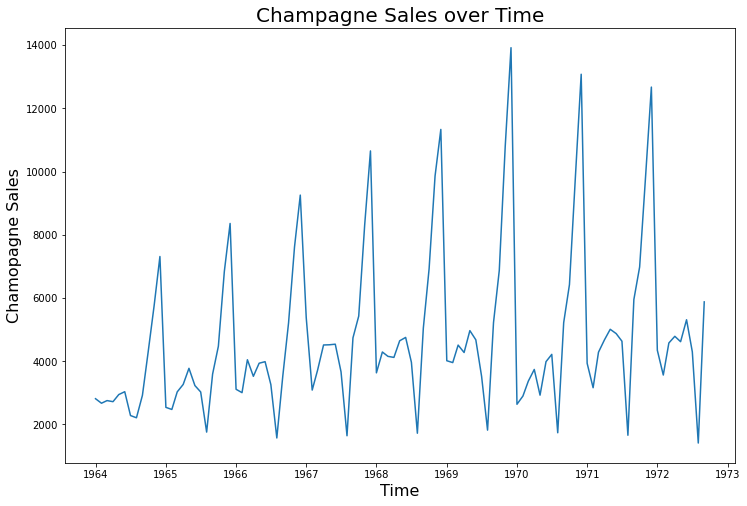

In [246]:
plt.figure(figsize=(12,8))
plt.plot(data)
plt.title('Champagne Sales over Time', fontsize=20)
plt.ylabel('Chamopagne Sales', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.show()

### Visualizing the data

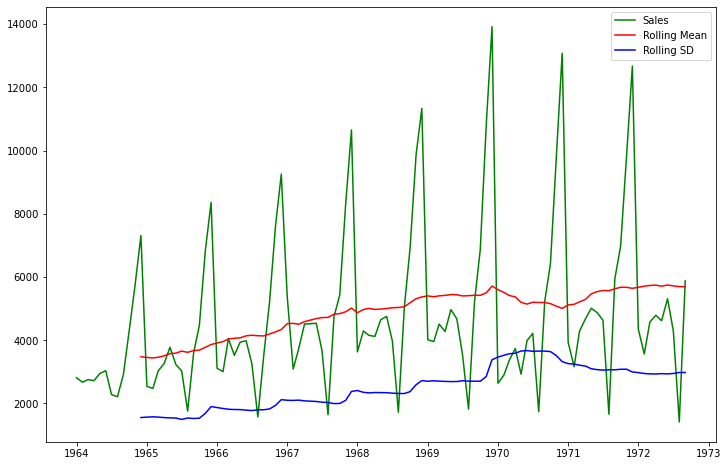

In [247]:
plt.figure(figsize=(12,8))
roll_mean = data['Sales'].rolling(12).mean()
roll_sd = data['Sales'].rolling(12).std()
plt.plot(data['Sales'],label='Sales', color='g')
plt.plot(roll_mean,color='r', label='Rolling Mean')
plt.plot(roll_sd,color='b', label='Rolling SD')
plt.legend()
plt.show()

From the above graph, we observe that the Rolling Mean and the Rolling Standard Deviation is not stationary.
Let us do further eveluation to check for stationarity.

# Seasonal Decomposition

In [248]:
# Importing Seasonal decompose Statsmodel library

from statsmodels.tsa.seasonal import seasonal_decompose

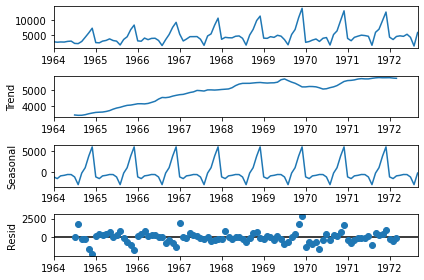

In [249]:
# Visualizing the seasonal decompose of the data

seasonal_decompose(data, model='additive').plot()
plt.show()

From the above seasonal decompose graph, we can say that there is a positive trend in the data along with seasonality.

### Checking for Stationarity

In [250]:
# First we have to check the stationarity using adfuller test (Augmented dickyfuller test)
#adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#most important value is p-value

In [251]:
# Importing adfuller statsmodel library

from statsmodels.tsa.stattools import adfuller

Let the null hypothesis be:

Ho: Data is not Stationary

and the alternative hypothesis be:

Ha: Data is stationary

In [252]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistics','P-Value','# lags used','No. of observations']
    for value,label in zip (result,labels):
        print(label+':'+str(value))
    if result[1]<0.05:
        print('Accept the Ha: Data is Stationary')
    else:
        print('Accept the Ho: Data is not Stationary')

In [253]:
adfuller_test(data['Sales'])

ADF test statistics:-1.8335930563276237
P-Value:0.3639157716602447
# lags used:11
No. of observations:93
Accept the Ho: Data is not Stationary


Using the adfuller test, we see that the data is not stationary.

Now we have to make the data stationary using various techniques such as differencing and many more.

### Differencing

In [254]:
# Now we have to take the first differencing as well as seasonal differencing of the data

In [255]:
data['Sales'].head(10)

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
1964-06-01    3036.0
1964-07-01    2282.0
1964-08-01    2212.0
1964-09-01    2922.0
1964-10-01    4301.0
Name: Sales, dtype: float64

In [256]:
# Shifting the data upto 1 place

data['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [257]:
# 1st differenced data

data['1st Diff'] = data['Sales']-data['Sales'].shift(1)

In [258]:
data.head()

,Sales,1st Diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [259]:
# Seasonal Differenced data

data['Seasonal Diff'] = data['Sales']-data['Sales'].shift(12)

In [260]:
data

,Sales,1st Diff,Seasonal Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [261]:
# Augmented Dickeyfuller Test on seasonal differencing

adfuller_test(data['Seasonal Diff'].dropna())

ADF test statistics:-7.626619157213163
P-Value:2.060579696813685e-11
# lags used:0
No. of observations:92
Accept the Ha: Data is Stationary


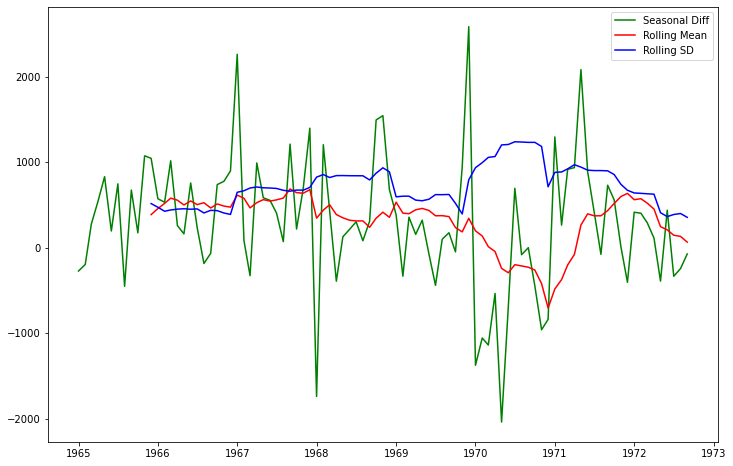

In [262]:
plt.figure(figsize=(12,8))
roll_mean = data['Seasonal Diff'].rolling(12).mean()
roll_sd = data['Seasonal Diff'].rolling(12).std()
plt.plot(data['Seasonal Diff'],label='Seasonal Diff', color='g')
plt.plot(roll_mean,color='r', label='Rolling Mean')
plt.plot(roll_sd,color='b', label='Rolling SD')
plt.legend()
plt.show()

## Auto Regression Model

In [263]:
# Auto correlation plot

In [264]:
from pandas.plotting import autocorrelation_plot

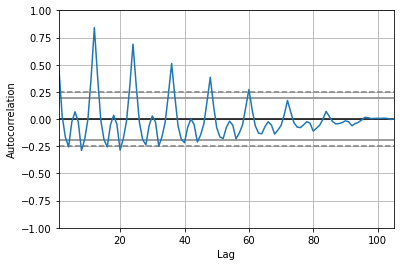

In [265]:
autocorrelation_plot(data['Sales'])
plt.show()

From the above autocorrelation plot, we observe that as the lags are increasing the autocorrelation is decreasing.

In [266]:
# Plotting of the ACF and PACF

In [267]:
# Importing acf and pacf statsmodel library

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

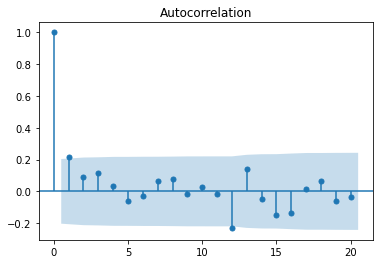

In [268]:
plot_acf(data['Seasonal Diff'].dropna(), lags=20)
plt.show()

Since the shut off in ACF model is at lag 1, the value of q=1

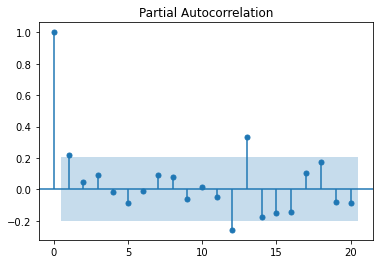

In [269]:
plot_pacf(data['Seasonal Diff'].dropna(), lags=20)
plt.show()

Since the taper in PACF model is at lag 1, the value of p=1

In [270]:
# d=1 since we have considered first differencing
# Hence we have, p=1, d=1, q=1

### ARIMA 

In [271]:
# Importing ARIMA library

from statsmodels.tsa.arima.model import ARIMA

In [272]:
model = ARIMA(data['Sales'], order=(1,1,1))

In [273]:
model_fit = model.fit()

In [274]:
# Model summary

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 06 Jun 2022   AIC                           1911.627
Time:                        18:10:25   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.314      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [275]:
# Forecasting Using ARIMA model

data['Forecast_ARIMA']=model_fit.predict(start=90, end=105, dynamic=True)

<AxesSubplot:xlabel='Month'>

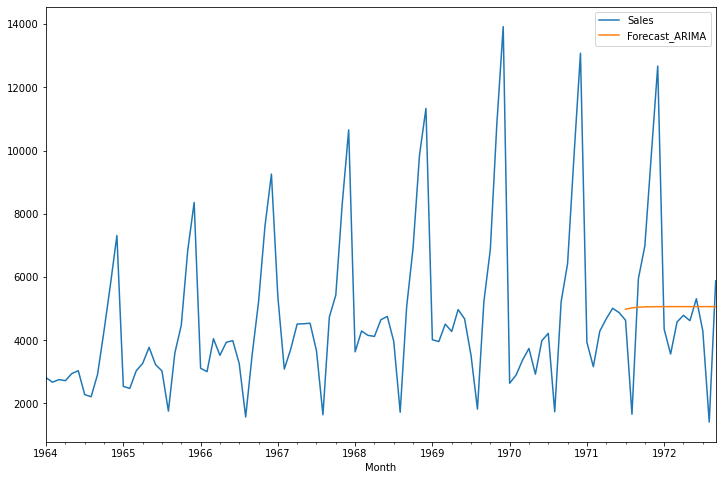

In [276]:
# Plotting the ARIMA model

data[['Sales','Forecast_ARIMA']].plot(figsize=(12,8))

This is not what we were expecting, the ARIMA model is not working properly on seasonal data. So we must now use Sarimax for our seasonal data

In [277]:
data.iloc[90:105,:]

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA
Month,,,,
1971-07-01,4633.0,-241.0,416.0,4977.077431
1971-08-01,1659.0,-2974.0,-79.0,5023.925600
1971-09-01,5951.0,4292.0,730.0,5045.217855
1971-10-01,6981.0,1030.0,557.0,5054.895077
1971-11-01,9851.0,2870.0,9.0,5059.293326
1971-12-01,12670.0,2819.0,-406.0,5061.292307
1972-01-01,4348.0,-8322.0,414.0,5062.200834
1972-02-01,3564.0,-784.0,402.0,5062.613755
1972-03-01,4577.0,1013.0,291.0,5062.801425


### SARIMAX

In [278]:
# Importing SARIMAX library

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [279]:
model_sarimax = SARIMAX(data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [280]:
result = model_sarimax.fit()

In [281]:
# Predictions

data['Forecast_SARIMAX']=result.predict(start=80, end=105, dynamic=True)

<AxesSubplot:xlabel='Month'>

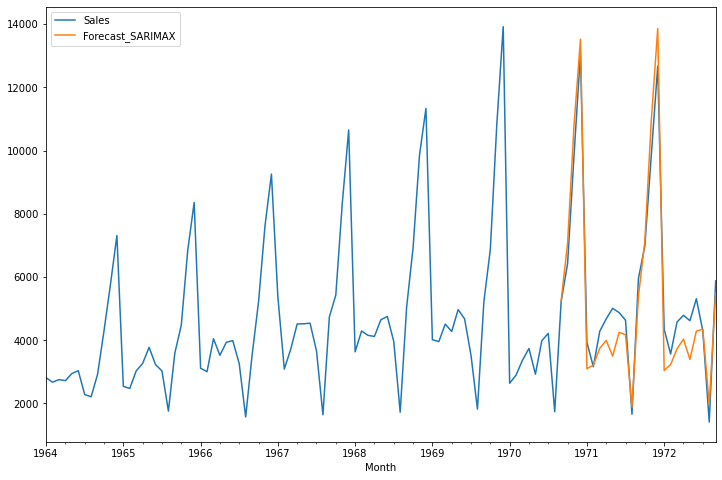

In [282]:
# Plotting

data[['Sales','Forecast_SARIMAX']].plot(figsize=(12,8))

In [283]:
data.iloc[80:105,:]

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
Month,,,,,
1970-09-01,5221.0,3483.0,-1.0,NaN,5257.752639
1970-10-01,6424.0,1203.0,-448.0,NaN,7069.315629
1970-11-01,9842.0,3418.0,-961.0,NaN,10798.739024
1970-12-01,13076.0,3234.0,-840.0,NaN,13518.907924
1971-01-01,3934.0,-9142.0,1295.0,NaN,3100.542155
1971-02-01,3162.0,-772.0,263.0,NaN,3213.454040
1971-03-01,4286.0,1124.0,916.0,NaN,3745.238472
1971-04-01,4676.0,390.0,936.0,NaN,3993.580497
1971-05-01,5010.0,334.0,2083.0,NaN,3496.565336


### Forecasting

In [284]:
from pandas.tseries.offsets import DateOffset

In [285]:
# Creating additional data

Future_dates = [data.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [286]:
Future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [287]:
new_data=pd.DataFrame(index=Future_dates[1:], columns=data.columns)

In [288]:
new_data

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [289]:
#Concatinating
fin_data = pd.concat([data,new_data])

In [290]:
fin_data.shape

(128, 5)

In [291]:
model_sarimax = SARIMAX(fin_data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [292]:
result=model_sarimax.fit()

In [293]:
#Predictions
fin_data['Forecast_SARIMAX'] = result.predict(start=103, end=128, dynamic=True)

<AxesSubplot:>

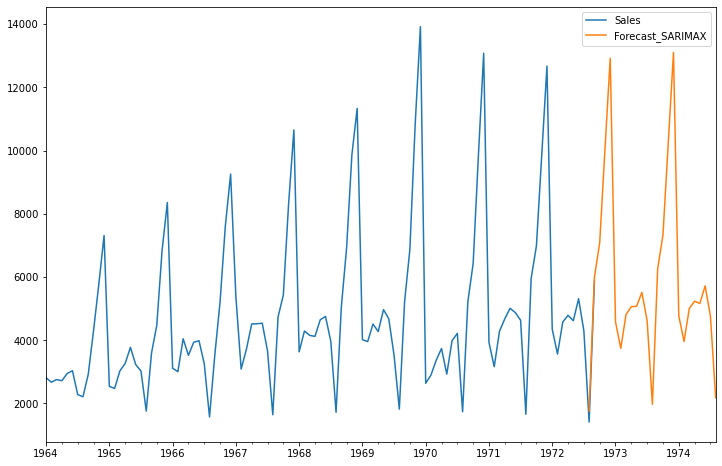

In [294]:
#Plotting
fin_data[['Sales','Forecast_SARIMAX']].plot(figsize=(12,8))

In [295]:
fin_data.tail(30)

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1972-03-01,4577.0,1013.0,291.0,5062.801425,NaN
1972-04-01,4788.0,211.0,112.0,5062.886721,NaN
1972-05-01,4618.0,-170.0,-392.0,5062.925487,NaN
1972-06-01,5312.0,694.0,438.0,5062.943106,NaN
1972-07-01,4298.0,-1014.0,-335.0,5062.951114,NaN
1972-08-01,1413.0,-2885.0,-246.0,5062.954753,1761.633422
1972-09-01,5877.0,4464.0,-74.0,5062.956407,5993.617703
1972-10-01,NaN,NaN,NaN,NaN,7073.963050
1972-11-01,NaN,NaN,NaN,NaN,10027.928564
1972-12-01,NaN,NaN,NaN,NaN,12918.586583
